In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

img = cv2.imread('img.png')
denoised = cv2.medianBlur(img, 1)
output = [img, denoised]

titles = ['Original', 'Denoised']

for i in range(2):
    plt.subplot(1, 3, i + 1)
    plt.imshow(output[i])
    plt.title(titles[i])
    plt.xticks([])
    plt.yticks([])
plt.show()

<Figure size 640x480 with 2 Axes>

C:\Users\josep\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:42: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


NameError: name 'img_pre1' is not defined

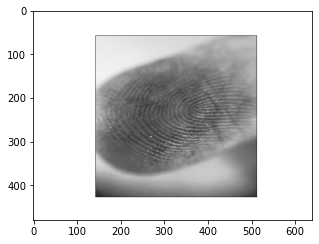

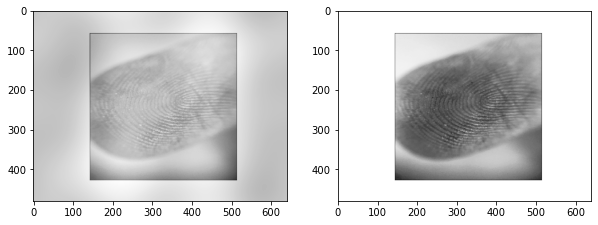

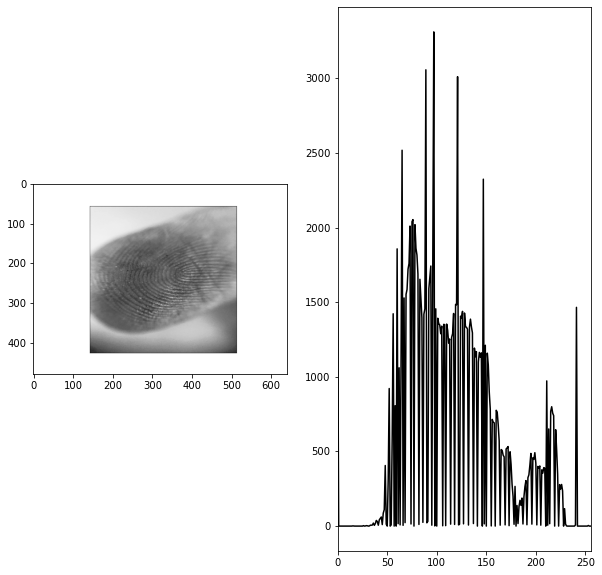

In [2]:
b, g, r = cv2.split(denoised)
img21_cropped_gray = denoised[:, :, 0]
# img21_cropped_gray = cv2.cvtColor(img21_cropped,cv2.COLOR_BGR2GRAY)

plt.figure(figsize=(5, 5))
plt.imshow(img21_cropped_gray, cmap='Greys_r')

dft = cv2.dft(np.float32(img21_cropped_gray), flags=cv2.DFT_COMPLEX_OUTPUT)
radius = 3

H = np.ones_like(dft)
for i in range(dft.shape[0]):
    for j in range(dft.shape[1]):
        if np.sqrt(i ** 2 + j ** 2) <= radius:
            H[i, j] = 0

fimage = dft * H
# fimage_spectrum = 20*np.log(cv2.magnitude(fimage[:,:,0],fimage[:,:,1]))


image_enhanced = cv2.idft(fimage, flags=cv2.DFT_SCALE | cv2.DFT_REAL_OUTPUT)

plt.figure(figsize=(10, 10))
plt.subplot(121)
plt.imshow(image_enhanced, cmap='Greys_r')

plt.subplot(122)
plt.imshow(img21_cropped_gray, cmap='Greys_r')

plt.figure(figsize=(10, 10))

plt.subplot(121)
plt.imshow(img21_cropped_gray, cmap='Greys_r')

plt.subplot(122)
histr = cv2.calcHist([img21_cropped_gray], [0], None, [256], [0, 255])
plt.plot(histr, color='k')
plt.xlim([0, 256])



plt.subplot(122)
img_pre2_test = cv2.equalizeHist(img_pre1)
plt.imshow(img_pre2_test, cmap='Greys_r')
plt.savefig('enhance11.jpg')


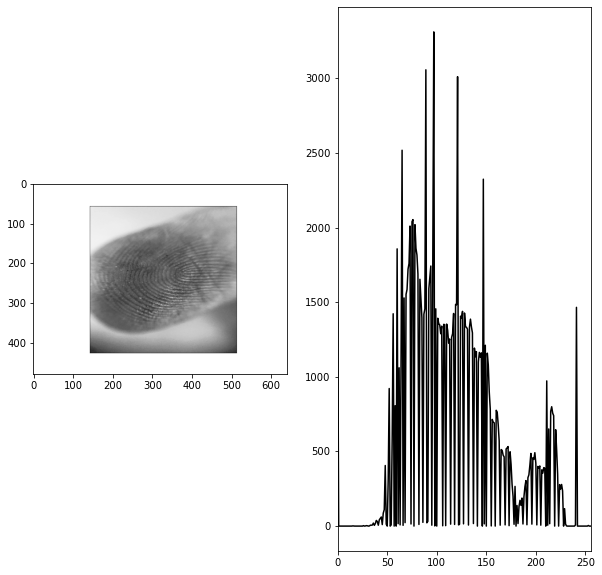

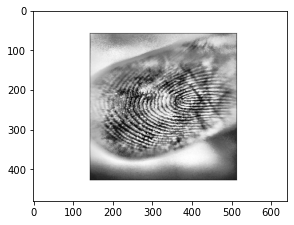

In [3]:
# build look up table
high = np.max(img21_cropped_gray)
low = np.min(img21_cropped_gray)

x = np.linspace(0, 255, 256);

declive = 255. / (high - low);
ordenada = - declive * low;
table = declive * x + ordenada;
table[0:low] = 0;
table[high:256] = 255;

table = np.array([table.astype('uint8')])
img_pre1 = cv2.LUT(img21_cropped_gray, table)

plt.figure(figsize=(10, 10))
plt.subplot(121)
plt.imshow(img_pre1, cmap='Greys_r')

plt.subplot(122)
histr = cv2.calcHist([img_pre1], [0], None, [256], [0, 255])
plt.plot(histr, color='k')
plt.xlim([0, 256])

plt.figure(figsize=(10, 10))
clahe = cv2.createCLAHE()

plt.subplot(121)
img_pre2 = clahe.apply(img_pre1)
plt.imshow(img_pre2, cmap='Greys_r')


In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
# Read the image
image2 = cv2.imread('img_2912.jpg', 0)
new_image = cv2.Laplacian(image2,cv2.CV_64F)
plt.figure(figsize=(11,6))
plt.subplot(131), plt.imshow(image2, cmap='gray'),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(new_image, cmap='gray'),plt.title('Laplacian')
plt.xticks([]), plt.yticks([])
plt.subplot(133), plt.imshow(image2 + new_image, cmap='gray'),plt.title('Resulting image')
plt.xticks([]), plt.yticks([])
plt.savefig('laplace.png')
plt.show()

<Figure size 1100x600 with 3 Axes>